# Probability


It is about determining the likelihood of an event.

- [Glossary](#glossary)
- [Addition rule](#addition-rule)
- [Multiplication rule](#multiplication-rule)
- [Types of probability distribution functions](#types-of-probability-distribution-functions)


In [2]:
!uv pip install -q\
    numpy==2.3.2 \
    matplotlib==3.10.6 \
    scipy==1.16.2

In [ ]:
import math

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch
from scipy.stats import binom, norm

## Glossary

- $\cup$: Union (Or logic). $P(A \cup B)$ means the probability of event A or event B occurring.
- $\cap$: Intersection (And logic). $P(A \cap B)$ means the probability of event A and event B both

Example: Flipping a coin (Heads/Tails) or rolling a dice (1 to 6).

$P(\text{Heads}) = \frac{1}{2}, \quad P(5) = \frac{1}{6}$


## Addition rule

Used to find the probability of A or B occurring, $P(A \cup B)$.

### Mutual exclusive event

Two events cannot happen at the same time (no overlap).

$P(A \cup B) = P(A) + P(B)$

- Example: Tossing a coin and getting Head or Tail.

$P(H \cup T) = P(H) + P(T) = \frac{1}{2} + \frac{1}{2} = 1$

- Real-World Use: Calculating the probability of a defective product being caused by Machine A or Machine B, if a single product can only be processed by one machine.

### Non Mutual exclusive event

Two events can happen at the same time (there is an overlap, $P(A \cap B)$).

$P(A \cup B) = P(A) + P(B) - P(A \cap B)$

- Example: Drawing a card that is a King or a Heart. The King of Hearts is the overlap.

$P(\text{King or Heart}) = P(\text{King}) + P(\text{Heart}) - P(\text{King of Heart})$

$P(\text{King or Heart}) = \frac{4}{52} + \frac{13}{52} - \frac{1}{52} = \frac{16}{52} = \frac{4}{13}$

- Real-World Use: Calculating the probability a customer buys a coffee or a pastry. You must subtract the probability that they buy both (the overlap) so you don't count them twice.


## Multiplication rule

Used to find the probability of A and B occurring, $P(A \cap B)$.

### Independent events

The occurrence of event A does not affect the probability of event B.

$P(A \cap B) = P(A) \cdot P(B)$

Example: Getting a Head on the first flip and a Tail on the second flip.

$P(H \cap T) = P(H) \cdot P(T) = \frac{1}{2} \cdot \frac{1}{2} = \frac{1}{4}$

Real-World Use: The probability that a customer in London clicks an ad and a different customer in New York clicks the same ad.

### Dependent events

The occurrence of event A affects the probability of event B. We use Conditional Probability: $P(B \mid A)$ is the probability of B given A has already occurred.

$P(A \cap B) = P(A) \cdot P(B \mid A)$

- Example: Taking a King card first, then a Queen card (without replacing the first card).

- $P(K \cap Q) = P(K) \cdot P(Q \mid K) = \frac{4}{52} \cdot \frac{4}{51}$

- Real-World Use: The probability of rain today given that the sky was cloudy this morning. Crucial for algorithms like Naive Bayes.


## Probability distribution functions

Describe how the probabilities are distributed over the values of a random variable.

- [Probability Mass Function PMF](probability-mass-function-pmf)
- [Cumulative Density Function CDF](#cumulative-density-function-cdf)
- [Probability Density Function PDF](probability-density-function-pdf)


#### Probability Mass Function PMF

Applies To: Discrete Random Variables (Countable outcomes like 0, 1, 2)

Purpose: Gives the probability that a discrete variable is exactly equal to some value $k$.


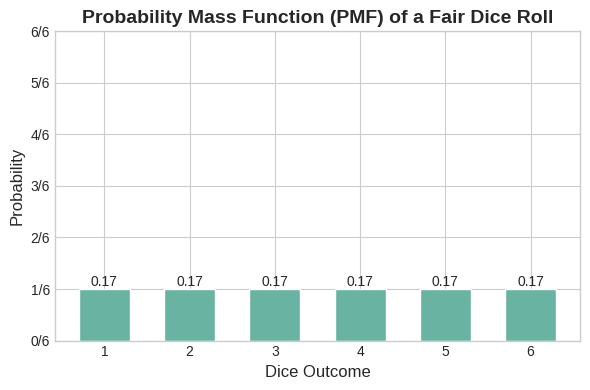

In [ ]:
x = np.arange(1, 7)
p = np.full(6, 1 / 6)  # Equal probability for each outcome

plt.style.use("seaborn-v0_8-whitegrid")
plt.figure(figsize=(6, 4))

plt.bar(x, p, color="#69b3a2", edgecolor="white", width=0.6)

for xi, pi in zip(x, p):
    plt.text(xi, pi + 0.01, f"{pi:.2f}", ha="center", fontsize=10)

plt.title(
    "Probability Mass Function (PMF) of a Fair Dice Roll",
    fontsize=14,
    weight="bold",
)
plt.xlabel("Dice Outcome", fontsize=12)
plt.ylabel("Probability", fontsize=12)

plt.yticks(np.arange(0, 1.1, 1 / 6), [f"{i}/6" for i in range(7)])

plt.tight_layout()
plt.show()

#### Probability Density Function PDF

Applies To: Continuous Random Variables (Measurable outcomes like height, temperature)

Purpose: Gives the relative likelihood of a continuous variable falling near a value. Area under the curve gives probability over an interval.


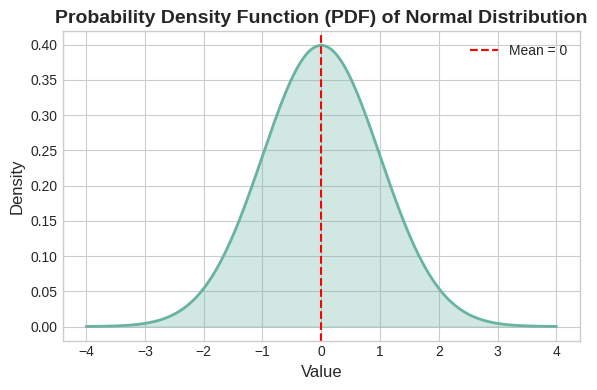

In [ ]:
x = np.linspace(-4, 4, 200)
pdf = norm.pdf(x, loc=0, scale=1)  # mean=0, std=1

plt.style.use("seaborn-v0_8-whitegrid")
plt.figure(figsize=(6, 4))

plt.plot(x, pdf, color="#69b3a2", lw=2)
plt.fill_between(x, pdf, color="#69b3a2", alpha=0.3)

plt.axvline(0, color="red", linestyle="--", lw=1.5, label="Mean = 0")

plt.title(
    "Probability Density Function (PDF) of Normal Distribution",
    fontsize=14,
    weight="bold",
)
plt.xlabel("Value", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend()

plt.tight_layout()
plt.show()

#### Cumulative Density Function CDF

Applies To: Both Discrete and Continuous

Purpose: Gives the probability that a variable is less than or equal to some value $x$. It sums the probabilities/densities up to $x$.


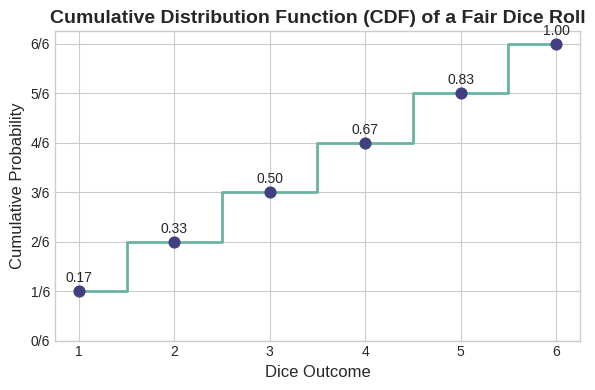

In [ ]:
x = np.arange(1, 7)
p = np.full(6, 1 / 6)

cdf = np.cumsum(p)

plt.style.use("seaborn-v0_8-whitegrid")
plt.figure(figsize=(6, 4))

plt.step(x, cdf, where="mid", color="#69b3a2", linewidth=2)
plt.scatter(x, cdf, color="#404080", s=60, zorder=3)

for xi, fi in zip(x, cdf):
    plt.text(xi, fi + 0.03, f"{fi:.2f}", ha="center", fontsize=10)

plt.title(
    "Cumulative Distribution Function (CDF) of a Fair Dice Roll",
    fontsize=14,
    weight="bold",
)
plt.xlabel("Dice Outcome", fontsize=12)
plt.ylabel("Cumulative Probability", fontsize=12)

plt.yticks(np.arange(0, 1.1, 1 / 6), [f"{i}/6" for i in range(7)])

plt.tight_layout()
plt.show()